**Rede Neural Convolucional(CNN) para reconhecimento de imagens de gatos e cachorros.**

* Previsão para apenas uma imagem

Importações iniciais

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import  BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image

Definição da Rede Neural

In [0]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2,2)))


classificador.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2,2)))

classificador.add(Flatten())

Criação da Rede Neural densa

In [0]:
classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 1, activation = 'sigmoid'))

classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

Augumentaion e testes com a Rede Neural


*   Augumentation é o processo de aumentar a quantidade de imagens, utilizando recursos automáticos do Keras.


In [0]:
gerador_treinamento = ImageDataGenerator(rescale = 1./255,
                                         rotation_range = 7,
                                         horizontal_flip = True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2)

In [0]:
gerador_teste = ImageDataGenerator(rescale = 1./255)

Leitura da base de dados

* Base de dados de treinamento

In [0]:
base_treinamento = gerador_treinamento.flow_from_directory('/content/drive/My Drive/Colab Notebooks/dataset/training_set',
                                                           target_size = (64,64),
                                                           batch_size = 32,
                                                           class_mode = 'binary')

Found 4014 images belonging to 2 classes.


* Base de dados de teste

In [0]:
base_test = gerador_teste.flow_from_directory('/content/drive/My Drive/Colab Notebooks/dataset/test_set',
                                              target_size = (64,64),
                                              batch_size = 32,
                                              class_mode = 'binary')

Found 1000 images belonging to 2 classes.


Treinamento da Rede Neural

In [0]:
classificador.fit_generator(base_treinamento, steps_per_epoch = 4014 ,
                            epochs = 3, validation_data = base_test,
                            validation_steps = 1000 )

Epoch 1/3
4014/4014 [==============================] - 1614s 402ms/step - loss: 0.1449 - accuracy: 0.9437 - val_loss: 2.1226 - val_accuracy: 0.7494
Epoch 2/3
4014/4014 [==============================] - 1604s 400ms/step - loss: 0.1019 - accuracy: 0.9615 - val_loss: 0.3341 - val_accuracy: 0.7791
Epoch 3/3
4014/4014 [==============================] - 1582s 394ms/step - loss: 0.0833 - accuracy: 0.9700 - val_loss: 0.8961 - val_accuracy: 0.7610


Previsão para uma só imagem

In [0]:
imagem_teste = image.load_img('/content/drive/My Drive/Colab Notebooks/dataset/test_set/gato/cat.3500.jpg',
                              target_size = (64, 64))

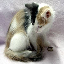

In [0]:
imagem_teste

Conversão da imagem em um vetor, com os pixels digitalizados.

In [0]:
imagem_teste = image.img_to_array(imagem_teste)

In [0]:
imagem_teste

array([[[196., 195., 201.],
        [195., 194., 200.],
        [209., 208., 214.],
        ...,
        [191., 188., 195.],
        [193., 190., 197.],
        [189., 186., 193.]],

       [[204., 203., 209.],
        [206., 205., 211.],
        [194., 193., 199.],
        ...,
        [192., 189., 196.],
        [197., 194., 201.],
        [187., 184., 191.]],

       [[196., 195., 201.],
        [196., 195., 201.],
        [193., 192., 198.],
        ...,
        [191., 188., 195.],
        [189., 186., 193.],
        [178., 175., 182.]],

       ...,

       [[250., 250., 250.],
        [249., 249., 249.],
        [252., 252., 252.],
        ...,
        [230., 228., 229.],
        [234., 232., 233.],
        [249., 247., 248.]],

       [[248., 248., 248.],
        [251., 251., 251.],
        [249., 249., 249.],
        ...,
        [226., 224., 225.],
        [231., 229., 230.],
        [248., 246., 247.]],

       [[249., 249., 249.],
        [247., 247., 247.],
        [245., 2

Aplicação da normalização nos dados

In [0]:
imagem_teste /= 255

In [0]:
imagem_teste = np.expand_dims(imagem_teste, axis = 0)

Previsão para a imagem

In [0]:
previsao = classificador.predict(imagem_teste)

In [0]:
previsao

array([[0.9937296]], dtype=float32)

O valor da variável previsão foi mais próximo de um 1. Dessa forma, podemos verificar o que seria a classe número 1 na nossa base de dados.

In [0]:
base_treinamento.class_indices

{'cachorro': 0, 'gato': 1}

In [0]:
if (previsao) >= 0.6:
  print('Gato')
else:
  print('Cachorro')

Gato
